# Log decrement method
based on lectures of Prof. Cimbala, ME341

##  The log-decrement method 
The log-decrement is based on the following analysis: 
    $$ \frac{q_o}{Kq_{is}} = 1-e^{-\zeta \omega_n t} \left[ \frac{1}{\sqrt{1-\zeta^2}}\sin\left(\omega_n t \sqrt{1-\zeta^2} + \sin^{-1} \left(\sqrt{1-\zeta^2} \right) \right) \right]$$

and the damped natural frequency: 
$$\omega_d = \omega_n \sqrt{1-\zeta^2}$$


Using the output of the system in time (step function response) we need to solve for $\omega_n$ and $\zeta$ simultaneously. The practical solution is the *log-decrement method*.

When $\zeta \sim 0.1\div 0.3$, then the sine function is approximately $\pm 1$ and the magnitude only (peaks of the oscillating function) behave approximately as: 

$$ \left| \frac{q_o}{Kq_{is}} - 1 \right| \approx \left| -e^{-\zeta \omega_n t} \frac{1}{\sqrt{1-\zeta^2}} \right| $$

Therefore we plot the normalized step founction output minus 1, obtain a function that oscillates around zero, and try to extract the peaks. We can use only positive peaks and mark them as $y^*_i, \quad i=1\dots n$ and their time instants, $t^*$. From these values we can obtain: 

1. The period of oscillations if we measure the time $t$ of $n$ cycles (e.g. $n=3$ in our example), $$ T = t/n $$

2. If we define the $\log$ of the reduction of amplitude between each peak as $\delta$: $$ \ln \left(\frac{y^*_i}{y^*_{i+n}}\right) = n\delta$$, then the damping factor is recovered as: $$ \zeta = \frac{\delta}{\sqrt{(2\pi)^2+\delta^2}}$$ and the rest is straightforward: $$ \omega_d = \frac{2\pi}{T} = 2\pi f_d$$ and $$ \omega_n = 2\pi f_n = \frac{\omega_d}{\sqrt{1-\zeta^2}} $$ 


    

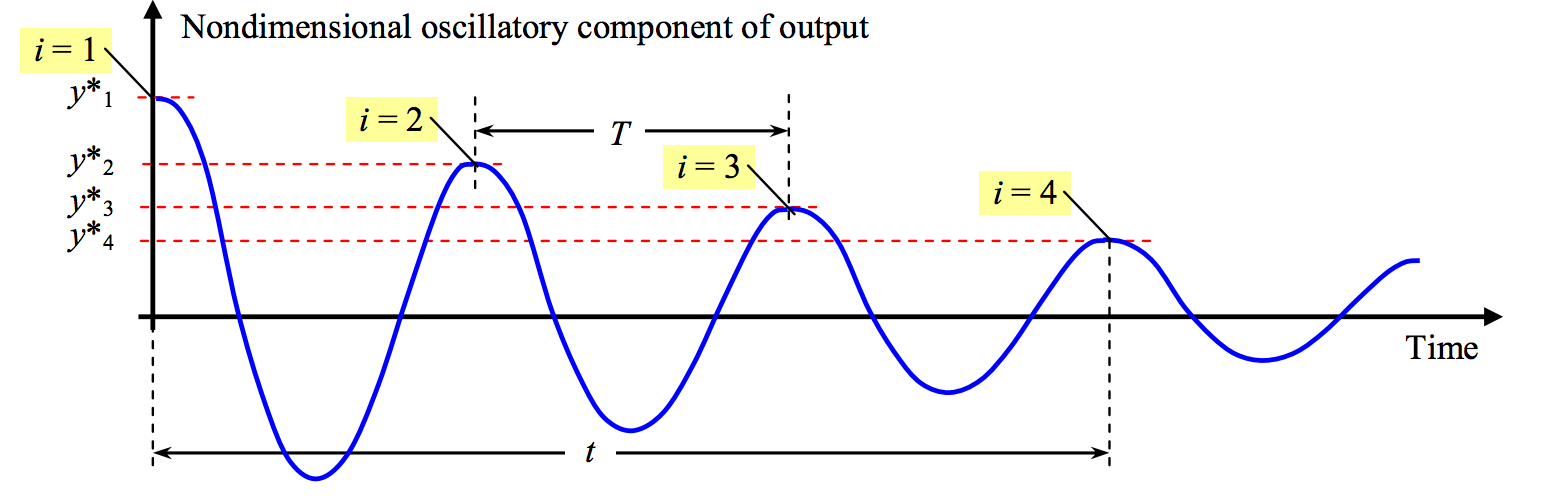

In [1]:
from IPython.core.display import Image 
Image(filename='../img/log-decrement.png',width=600)

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'E [V]')

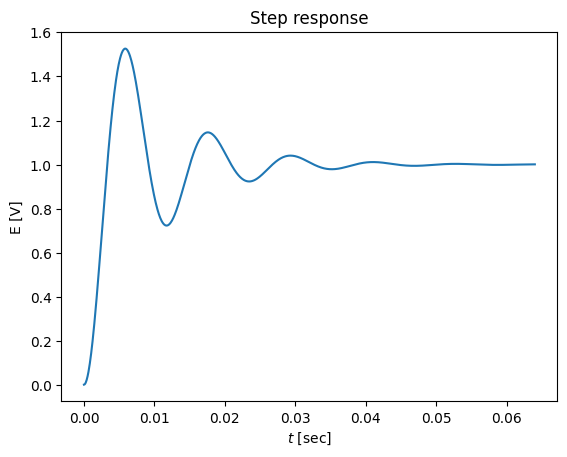

In [3]:
from scipy import signal

# Define transfer function
k = 1 		# sensitivity
wn = 546.72 # rad/s
z=0.2     # damping

sys = signal.lti(k*wn**2,[1,2*z*wn, wn**2])

# step function output
t,y = sys.step(N=1000)

plot(t,y)
title('Step response')
xlabel('$t$ [sec]')
ylabel('E [V]')

In [4]:
# note that sampling is sufficient, if not we need to apply the D/A reconstruction
# or interpolations, which will add more noise and uncertainty to the system identification

Text(0, 0.5, 'E [V]')

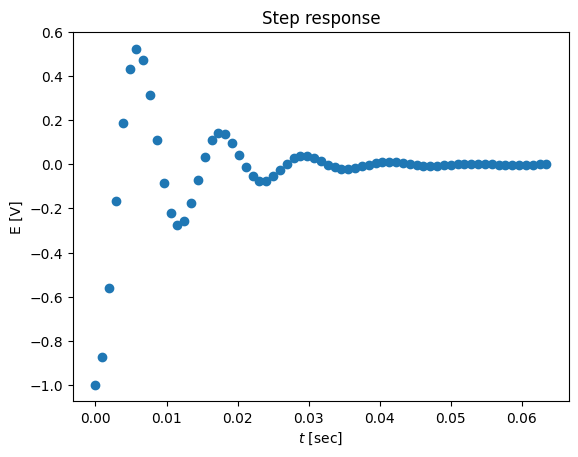

In [5]:
# plot the data as a decrement

ts = t[::15]
ys = y[::15]

plot(ts,ys-1,'o')
title('Step response')
xlabel('$t$ [sec]')
ylabel('E [V]')

In [6]:
# we will use the open source peakdetect function from 

def peakdet(v, delta, x = None):
    """
    Converted from MATLAB script at http://billauer.co.il/peakdet.html
    
    Returns two arrays
    
    function [maxtab, mintab]=peakdet(v, delta, x)
    %PEAKDET Detect peaks in a vector
    %        [MAXTAB, MINTAB] = PEAKDET(V, DELTA) finds the local
    %        maxima and minima ("peaks") in the vector V.
    %        MAXTAB and MINTAB consists of two columns. Column 1
    %        contains indices in V, and column 2 the found values.
    %      
    %        With [MAXTAB, MINTAB] = PEAKDET(V, DELTA, X) the indices
    %        in MAXTAB and MINTAB are replaced with the corresponding
    %        X-values.
    %
    %        A point is considered a maximum peak if it has the maximal
    %        value, and was preceded (to the left) by a value lower by
    %        DELTA.
    
    % Eli Billauer, 3.4.05 (Explicitly not copyrighted).
    % This function is released to the public domain; Any use is allowed.
    
    """
    maxtab = []
    mintab = []
       
    if x is None:
        x = arange(len(v))
    
    v = asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True

    return array(maxtab), array(mintab)

# if __name__=="__main__":
#     from matplotlib.pyplot import plot, scatter, show
#     series = [0,0,0,2,0,0,0,-2,0,0,0,2,0,0,0,-2,0]
#     maxtab, mintab = peakdet(series,.3)
#     plot(series)
#     scatter(array(maxtab)[:,0], array(maxtab)[:,1], color='blue')
#     scatter(array(mintab)[:,0], array(mintab)[:,1], color='red')
#     show()

In [7]:
maxtab, mintab = peakdet(ys-1,.01,ts)

In [8]:
# we need only positive peaks, maxima:
maxtab

array([[0.0057674 , 0.52586962],
       [0.0173022 , 0.14414951],
       [0.02979824, 0.03919356],
       [0.04133304, 0.01110418]])

Text(0, 0.5, 'E [V]')

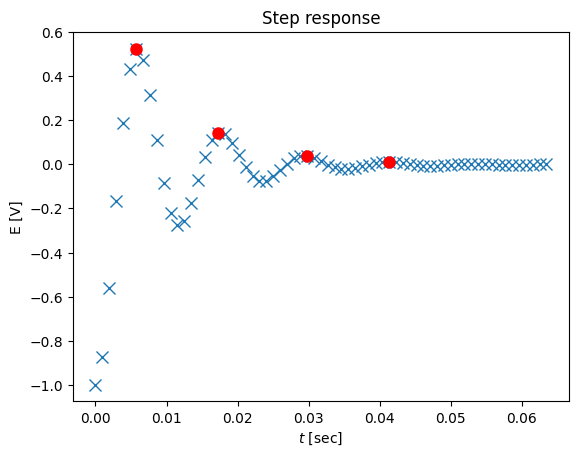

In [9]:
# We see 4 peaks and therefore n = 4
tstar = maxtab[:,0]
ystar = maxtab[:,1]

# plot the data with the peaks

plot(ts,ys-1,'x',tstar,ystar,'ro',markersize=8)
title('Step response')
xlabel('$t$ [sec]')
ylabel('E [V]')

In [10]:
n = len(tstar)-1
print("cycles = %d" % n)

cycles = 3


In [11]:
T = (tstar[-1] - tstar[0])/(n)
print ("period T= %4.3f sec" % T)

period T= 0.012 sec


In [12]:
# delta 
d = log(ystar[0]/ystar[-1])/(n)
print ("delta = %4.3f " % d)

delta = 1.286 


In [13]:
# recover the damping and the frequency:
zeta= d/(sqrt((2*pi)**2 + d**2))
omegad = 2*pi/T
omegan = omegad/(sqrt(1-zeta**2))
# output
print ("natural frequency = %4.3f" % omegan)
print ("damping factor = %4.3f" % zeta)
print ("compare to the original: 546.72, 0.2")

natural frequency = 540.979
damping factor = 0.201
compare to the original: 546.72, 0.2
